<a href="https://colab.research.google.com/github/Gavinlai01/FINA5270-IndividualReport/blob/main/Individual%20Report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Install the required package

In [ ]:
!pip install fredapi &> /dev/null
!pip install yfinance &> /dev/null
!pip install matplotlib==3.1.1 &> /dev/null

## Get the necessary data from FRED

In [72]:
from fredapi import Fred
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
fred = Fred(api_key='d01d199e0673e6009d985f05a7a39ff2')
def Get_Data(code):
  data = fred.get_series(code).to_frame()
  data.columns = [code]
  data.index.names = ['Date']
  return data

### Inflation Rate

Consumer Price Index for All Urban Consumers: All Items in U.S. City Average (CPIAUCSL)

In [73]:
CPIAUCSL = Get_Data('CPIAUCSL')
CPIAUCSL = CPIAUCSL.resample('M').last()
CPIAUCSL['InflationRate_All'] = CPIAUCSL['CPIAUCSL'].pct_change(periods=12)
min_max_scaler = MinMaxScaler()
CPIAUCSL[["InflationRate_All"]] = min_max_scaler.fit_transform(CPIAUCSL[["InflationRate_All"]])
CPIAUCSL

,CPIAUCSL,InflationRate_All
Date,,
1947-01-31,21.480,NaN
1947-02-28,21.620,NaN
1947-03-31,22.000,NaN
1947-04-30,22.000,NaN
1947-05-31,21.950,NaN
...,...,...
2021-12-31,280.126,0.573631
2022-01-31,281.933,0.598056
2022-02-28,284.182,0.620017


Consumer Price Index for All Urban Consumers: All Items Less Food and Energy in U.S. City Average (CPILFESL)

In [51]:
CPILFESL = Get_Data('CPILFESL')
CPILFESL = CPILFESL.resample('M').last()
CPILFESL['InflationRate_LessFoodEnergy'] = CPILFESL['CPILFESL'].pct_change(periods=12)
min_max_scaler = MinMaxScaler()
CPILFESL[["InflationRate_LessFoodEnergy"]] = min_max_scaler.fit_transform(CPILFESL[["InflationRate_LessFoodEnergy"]])
CPILFESL

,CPILFESL,InflationRate_LessFoodEnergy
Date,,
1957-01-31,28.500,NaN
1957-02-28,28.600,NaN
1957-03-31,28.700,NaN
1957-04-30,28.800,NaN
1957-05-31,28.800,NaN
...,...,...
2021-12-31,284.770,0.054766
2022-01-31,286.431,0.060408
2022-02-28,287.878,0.064157


### FED open market operations

Assets: Total Assets: Total Assets (Less Eliminations from Consolidation): Wednesday Level (WALCL)

In [74]:
WALCL = Get_Data('WALCL')
WALCL = WALCL.resample('M').last()
WALCL['AssetPct'] = WALCL['WALCL'].pct_change()
min_max_scaler = MinMaxScaler()
WALCL[["AssetPct"]] = min_max_scaler.fit_transform(WALCL[["AssetPct"]])
WALCL

,WALCL,AssetPct
Date,,
2002-12-31,732059.0,NaN
2003-01-31,712809.0,0.148082
2003-02-28,721980.0,0.199316
2003-03-31,725019.0,0.187991
2003-04-30,746294.0,0.220873
...,...,...
2022-01-31,8860485.0,0.197874
2022-02-28,8928129.0,0.192471
2022-03-31,8937142.0,0.183804


Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.


Currency in Circulation (CURRCIR)

In [75]:
CURRCIR = Get_Data('CURRCIR')
CURRCIR = CURRCIR.resample('M').last()
CURRCIR['CURRCIRPct'] = CURRCIR['CURRCIR'].pct_change()
min_max_scaler = MinMaxScaler()
CURRCIR[["CURRCIRPct"]] = min_max_scaler.fit_transform(CURRCIR[["CURRCIRPct"]])
CURRCIR

,CURRCIR,CURRCIRPct
Date,,
1917-08-31,3.714,NaN
1917-09-30,3.774,0.443620
1917-10-31,3.865,0.468057
1917-11-30,3.916,0.434531
1917-12-31,4.055,0.503015
...,...,...
2021-12-31,2223.870,0.411112
2022-01-31,2233.621,0.407473
2022-02-28,2232.107,0.391925


Asset = Currency in Circulation + Reserve

### Economy Performance

Unemployment Rate (UNRATE)

In [76]:
UNRATE = Get_Data('UNRATE')
UNRATE = UNRATE.resample('M').last()
min_max_scaler = MinMaxScaler()
UNRATE[["UNRATE"]] = min_max_scaler.fit_transform(UNRATE[["UNRATE"]])
UNRATE

,UNRATE
Date,
1948-01-31,0.073770
1948-02-29,0.106557
1948-03-31,0.122951
1948-04-30,0.114754
1948-05-31,0.081967
...,...
2021-12-31,0.114754
2022-01-31,0.122951
2022-02-28,0.106557


Initial Claims (ICSA)

In [77]:
ICSA = Get_Data('ICSA')
ICSA = ICSA.resample('M').last()
min_max_scaler = MinMaxScaler()
ICSA[["ICSA"]] = min_max_scaler.fit_transform(ICSA[["ICSA"]])
ICSA

,ICSA
Date,
1967-01-31,0.007261
1967-02-28,0.013831
1967-03-31,0.014696
1967-04-30,0.016079
1967-05-31,0.011411
...,...
2022-01-31,0.008990
2022-02-28,0.003458
2022-03-31,0.001556


## Data Processing

In [78]:
Data = pd.concat([CPIAUCSL, CPILFESL, WALCL, CURRCIR, UNRATE, ICSA], axis=1)

In [79]:
Data

,CPIAUCSL,InflationRate_All,CPILFESL,InflationRate_LessFoodEnergy,WALCL,AssetPct,CURRCIR,CURRCIRPct,UNRATE,ICSA
Date,,,,,,,,,,
1917-08-31,NaN,NaN,NaN,NaN,NaN,NaN,3.714,NaN,NaN,NaN
1917-09-30,NaN,NaN,NaN,NaN,NaN,NaN,3.774,0.443620,NaN,NaN
1917-10-31,NaN,NaN,NaN,NaN,NaN,NaN,3.865,0.468057,NaN,NaN
1917-11-30,NaN,NaN,NaN,NaN,NaN,NaN,3.916,0.434531,NaN,NaN
1917-12-31,NaN,NaN,NaN,NaN,NaN,NaN,4.055,0.503015,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2022-01-31,281.933,0.598056,286.431,0.060408,8860485.0,0.197874,2233.621,0.407473,0.122951,0.008990
2022-02-28,284.182,0.620017,287.878,0.064157,8928129.0,0.192471,2232.107,0.391925,0.106557,0.003458
2022-03-31,287.708,0.656738,288.811,0.064360,8937142.0,0.183804,2257.649,0.429149,0.090164,0.001556


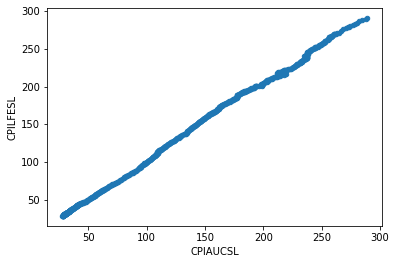

In [80]:
import matplotlib.pyplot as plt
Data.plot(x ='CPIAUCSL', y='CPILFESL', kind = 'scatter')
plt.show()

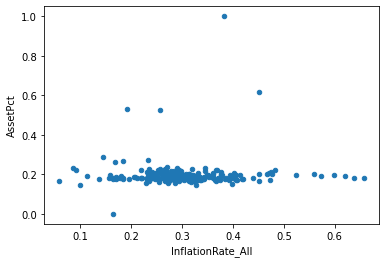

In [82]:
Data.plot(x ='InflationRate_All', y='AssetPct', kind = 'scatter')
plt.show()

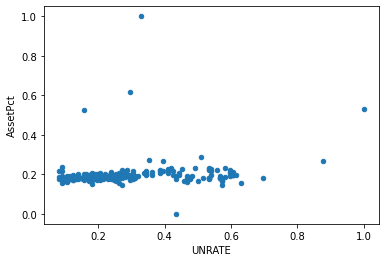

In [83]:
Data.plot(x ='UNRATE', y='AssetPct', kind = 'scatter')
plt.show()

## Shrink the balance sheet
1. Tappering: Reducing the monthly pace of net purchases of Treasury securities and agency MBS
2. Raise Interest Rate > will reduce the Valuation of Growth Stock (Tech companies)
3. Balance Sheet Runoff. 